# Final Project - Cereal Wars

The data set for this project comes from [Wikipedia's List of Breakfast Cereals](https://en.wikipedia.org/wiki/List_of_breakfast_cereals) page.

https://www.theguardian.com/lifeandstyle/2016/nov/28/breakfast-health-america-kellog-food-lifestyle
"The cliche that breakfast is the most important meal – and one with very specific food groups – developed from those early days of cereal."

At the end we will have a cereal faceoff in Cereal Wars. A cereal bracket will be created of the most trending cereals on Google. These cereals will compete in their very own cereal Wiki Edit wars. Which cereal is the most debated, the most popular, and why?


**Google Trends**
<p>We live in a wonderful new age where we no longer have to solely rely on data sets created from surveys. We can now measure the behavior of people by watching what they do on the internet.<br>

Google Trends is a public tool to see what people are doing on the internet. You can measure interest on a search topic over time or by geography. You can also compare up to five different search topics. It is not measuring the overall query volume. It is measuring the normalized, relative share of Google searches on a topic compared to all other searches for that time and place.

# The Big Companies
According to [Wikipedia's List of Breakfast Cereals Page](https://en.wikipedia.org/wiki/List_of_breakfast_cereals) (where the project's dataset is sourced from) many cereals are trademarked brands of large companies, such as **Kellogg's**, **General Mills**, **Malt-O-Meal**, **Nestlé**, **Quaker Oats**, and **Post Foods**.<br><br>
Let's start our data analyzation by scraping some data about these companies from Google Trends!<br>[PyTrends GitHub repository](https://github.com/GeneralMills/pytrends)

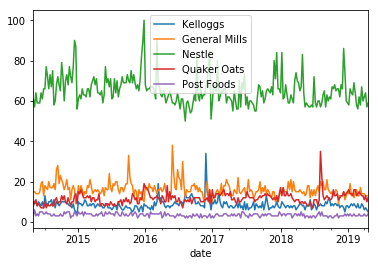

In [1]:
from pytrends.request import TrendReq
import matplotlib.pyplot as plt

pytrends = TrendReq(hl='en-US', tz=360)
kw_list = ["Kelloggs",
           "General Mills",
           "Nestle",
           "Quaker Oats",
           "Post Foods"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='US', gprop='')
df = pytrends.interest_over_time()

df.plot()
plt.show()

# Grab & Clean the Data

In [2]:
import requests as rq
import json, re, os

def get_list_of_cereal():
    """Returns list of cereals."""
    # Format query
    endpoint = "https://en.wikipedia.org/w/api.php?"
    prop = "prop=revisions"
    rvprop = "rvprop=content"
    action = "action=query"
    _format = "format=json"
    titles = "titles=List_of_breakfast_cereals"
    cmlimit = "cmlimit=500"
    cmcontinue = ""

    query_url = "&".join([endpoint, prop, rvprop, action, titles, _format, cmlimit, cmcontinue])
    data = rq.get(query_url, headers={'User-agent': 'ulfs bot'}).json()

    return data

# Extract lists of cereal
cereal_list = get_list_of_cereal()

In [3]:
markup = list(cereal_list['query']['pages'].values())[0]['revisions'][0]['*']
markup

'{{short description|A listing of notable breakfast cereals}}\n{{Use dmy dates|date=January 2012}}\n\nThis is a \'\'\'list of [[breakfast cereal]]s\'\'\'. Many cereals are [[trademark]]ed [[brand]]s of large companies, such as [[Kellogg\'s]], [[General Mills]], [[Malt-O-Meal Company|Malt-O-Meal]], [[Nestlé]], [[Quaker Oats Company|Quaker Oats]] and [[Post Foods]], but similar equivalent products are often sold by other manufacturers and as [[store brand]]s.\n\n{{dynamiclist}}\n\n<center>{{compact ToC|side=yes|top=yes|num=no}}</center>\n\n==A==\n[[File:AppleJacks.jpg|thumb|Apple Jacks]]\n*[[All-Bran]] – [[Kellogg\'s]] (1916–present)\n*Almond Delight – [[Ralcorp|Ralston]]\n*[[Alpen (food)|Alpen]] – [[Weetabix Limited]]\n* Alpen No Sugar -[[ Weetabix Limited]]\n*[[Alpha-Bits]] – [[Post Cereals]] (1958–present)\n*[[Apple Jacks]] – [[Kellogg\'s]] (1965–present)\n**Apple DJ Crashers – [[Kellogg\'s]] (2007)\n**Apple Jacks Apple Clones – [[Kellogg\'s]] (2010–present)\n**Cinnamon Jacks - [[Kell

In [4]:
# clean the markup and organize into a list
cleaning_list = []

cereal_list = re.findall(r'\n\*(.*)', markup)

cereal_list[0].split(" – ")[0]

for item in cereal_list:
    cleaning_list.append(item.split(" – ")[0])
    
#eliminate unnecessary words/characters after break cereal names
cleaning_list = [re.sub(r'(\[\[)|(\]\])|(\s\((.*))|(\*\s)|(\<(.*))|(\|(.*))|(\#(.*))', '', item) for item in cleaning_list]
cleaning_list = [re.sub(r'(\s\–\{(.*))|(\s\(\d(.*))|(^\s)|(^\*)|(^\s)|(\')', '', item) for item in cleaning_list]
cleaning_list = [re.sub(r'(\s\-\s)|(\-)', ' ', item) for item in cleaning_list]
cleaning_list = [re.sub(r'(\sGeneral Mills(.*))|\sKelloggs(.*)|(\swith(.*))', '', item) for item in cleaning_list]
cleaning_list = [re.sub(r'(\é)|(Ã¨)|(è)', 'e', item) for item in cleaning_list]
cleaning_list = [re.sub(r'(Ã¶)|(ö)', 'o', item) for item in cleaning_list]
cleaning_list.remove('Kelloggs')
cleaning_list.remove('Krunchios')
cleaning_list.remove('Quaker Oats Company')
cleaning_list.remove('List of breakfast cereal advertising characters')
cleaning_list.remove('List of breakfast foods')
cleaning_list.remove('List of breakfast topics')
cleaning_list.remove('Breakfast cereal')
cleaning_list.remove('[https://web.archive.org/web/20060311151728/http://www.kelloggs.com/promotions/starwars/ee_cereals.shtml Star Wars cereal]')

cleaning_list

['All Bran',
 'Almond Delight',
 'Alpen',
 'Alpen No Sugar Weetabix Limited',
 'Alpha Bits',
 'Apple Jacks',
 'Apple DJ Crashers',
 'Apple Jacks Apple Clones',
 'Cinnamon Jacks',
 'CinnaScary Apple Jacks',
 'Apple Jacks Double Vision',
 'Apple Raisin Crisp',
 'Apple Zings',
 'Aquaman Funko',
 'Atlantis: The Lost Empire',
 'Avengers',
 'Basic 4',
 'Batman Ralcorp',
 'Batman Funko',
 'Batman',
 'Batman Returns Ralcorp',
 'Monster cereals',
 'Black Panther',
 'Booty Os FYE',
 'Buzz Blasts',
 'Cabbage Patch Kids Cereal 1980s',
 'The California Raisins',
 'Capn Crunch',
 'Capn Crunch',
 'Peanut Butter Crunch Quaker Oats',
 'Punch Crunch Quaker Oats',
 'Vanilly Crunch Quaker Oats',
 'Captain Planet Cereal',
 'Caramel Crunchfuls',
 'Cars',
 'Cars 2',
 'Cars 3',
 'The Cat in the Hat',
 'Cheerios',
 'Ancient Grain Cheerios',
 'Apple Cinnamon Cheerios',
 'Banana Nut Cheerios',
 'Berry Burst Cheerios',
 'Berry Burst Cheerios',
 'Berry Burst Cheerios',
 'Cheerios Protein Cheerios',
 'Cinnamon Chee

Here is the cleaned markup data from the Wikipedia webpage!<br>
Transforming the list into a set eliminates duplicate elements so we aren't repeating data.

In [5]:
clean_list = set(cleaning_list)

print("Total number of cereal: %d"%(len(clean_list)))

Total number of cereal: 441


In [6]:
clean_list

{'"oho!" breakfast cereals',
 'All Bran',
 'Almond Delight',
 'Alpen',
 'Alpen No Sugar Weetabix Limited',
 'Alpha Bits',
 'Ancient Grain Cheerios',
 'Animal Planet',
 'Apple Cinnamon Cheerios',
 'Apple Cinnamon Chex',
 'Apple DJ Crashers',
 'Apple Jacks',
 'Apple Jacks Apple Clones',
 'Apple Jacks Double Vision',
 'Apple Raisin Crisp',
 'Apple Zings',
 'Aquaman Funko',
 'Atlantis: The Lost Empire',
 'Avengers',
 'Banana Creme Frosted Flakes',
 'Banana Frosted Flakes',
 'Banana Nut Cheerios',
 'Basic 4',
 'Batman',
 'Batman Funko',
 'Batman Ralcorp',
 'Batman Returns Ralcorp',
 'Berry Burst Cheerios',
 'Berry Lucky Charms',
 'Birthday Confetti Frosted Flakes',
 'Bite Size Frosted Blueberry Muffin',
 'Bite Size Frosted Chocolate',
 'Bite Size Frosted Cinnamon Streusel',
 'Bite Size Frosted Maple and Brown Sugar',
 'Bite Size Frosted Mini Wheats',
 'Bite Size Frosted Strawberry Delight',
 'Bite Size Frosted Vanilla Creme',
 'Black Panther',
 'Booty Os FYE',
 'Buzz Blasts',
 'Cabbage Patc

**Save List locally to CSV file**

In [7]:
import pandas as pd

df = pd.DataFrame(clean_list, columns=["Cereal"])
df.to_csv('cereal_list.csv', index=False)

**Calculate Search Interest with Pytrends API**

In [21]:
import os, csv
from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360)
kwds = []
for row in csv.reader(open('cereal_list.csv')):
         kwds.append(row[0])

In [22]:
# chunk the list into groups of 5 since PyTrends is limited to 5 item searches
chunks_list = [kwds[i:i + 5] for i in range(0, len(kwds), 5)]
chunks_list

[['Mueslix',
  'Go Lean Cereal',
  'SpongeBob Squarepants',
  'Neopets',
  'French Toast Crunch'],
 ['Mickey Mouse', 'Sesame Street', 'Complete', 'Uncle Sam Cereal', 'Shrek'],
 ['Product 19',
  'Puff',
  'Honey Nut Chex',
  'Frosted Mini Wheats Strawberry Delight',
  'Krave'],
 ['Granola',
  'Ice Cream Cones',
  'Pirates of the Caribbean',
  'Halfsies',
  'Corn Soya'],
 ['The Lost World: Jurassic Park',
  'Toasties',
  'Freakies',
  'Frosted Flakes Gold',
  'Batman Funko'],
 ['Mallow Oats',
  'Monster cereals',
  'Mr. T Cereal',
  'Puffed Wheat',
  'Cocoa Pebbles Post Cereals'],
 ['Maple Bacon Donuts Honey Bunches of Oats Post Cereals',
  'Force',
  'Banana Frosted Flakes',
  'Honey Bunches of Oats Just Bunches',
  'Maple & Brown Sugar Mini Spooners'],
 ['The Fairly OddParents',
  'Puffa Puffa Rice',
  'Vanilla Life',
  'Cinnamon Burst Cheerios',
  'Pop Tarts'],
 ['Honey Bunny',
  'Atlantis: The Lost Empire',
  'Dunkin Donuts',
  'Cran Vanilla Crunch',
  'Chocolate Donutz'],
 ['Mini Sw

In [23]:
len(chunks_list)

89

In [24]:
# generate dataframe for interest over the last year (US Region) of all cereal types
df_over_time = pd.DataFrame()
i=0
while i<len(chunks_list):
    pytrends.build_payload(chunks_list[i], cat=0, timeframe='today 12-m', geo='US', gprop='')
    time_data = pytrends.interest_over_time()
    df_over_time = df_over_time.append(time_data, ignore_index=False, sort=False)
    i=i+1
#pytrends.interest_by_region()

In [25]:
df_over_time = df_over_time.fillna(0.0)
df_over_time = df_over_time.drop('isPartial', axis=1)
df_over_time = df_over_time.groupby(df_over_time.index).sum()
df_over_time
#df_over_time.sort_values("date", axis=0, ascending=True)

Mueslix  Go Lean Cereal  SpongeBob Squarepants  Neopets  \
date                                                                  
2018-05-06      0.0             0.0                   36.0     26.0   
2018-05-13      0.0             1.0                   37.0     26.0   
2018-05-20      0.0             1.0                   38.0     25.0   
2018-05-27      0.0             1.0                   39.0     28.0   
2018-06-03      0.0             1.0                   36.0     28.0   
2018-06-10      0.0             1.0                   36.0     26.0   
2018-06-17      0.0             1.0                   36.0     23.0   
2018-06-24      1.0             1.0                   32.0     22.0   
2018-07-01      0.0             1.0                   37.0     26.0   
2018-07-08      1.0             1.0                   40.0     28.0   
2018-07-15      1.0             1.0                   43.0     22.0   
2018-07-22      0.0             1.0                   37.0     36.0   
2018-07-29      1.0             1.0                   37.0     31.0   
2018-08-05      0.0             1.0                   43.0     29.0   
2018-08-12      0.0             1.0                   38.0     24.0   
2018-08-19      0.0             0.0                   35.0     28.0   
2018-08-26      0.0             1.0                   39.0     27.0   
2018-09-02      0.0             1.0                   32.0     25.0   
2018-09-09      0.0             0.0                   32.0     19.0   
2018-09-16      0.0             1.0                   34.0     24.0   
2018-09-23      0.0             0.0                   32.0     20.0   
2018-09-30      0.0             0.0                   31.0     22.0   
2018-10-07      0.0             1.0                   30.0     24.0   
2018-10-14      0.0             0.0                   30.0     20.0   
2018-10-21      0.0             1.0                   27.0     21.0   
2018-10-28      0.0             1.0                   33.0     23.0   
2018-11-04      0.0             1.0                   33.0     22.0   
2018-11-11      1.0             0.0                   37.0     22.0   
2018-11-18      0.0             0.0                   34.0     18.0   
2018-11-25      0.0             0.0                  100.0     22.0   
2018-12-02      0.0             0.0                   48.0     24.0   
2018-12-09      0.0             1.0                   40.0     20.0   
2018-12-16      0.0             0.0                   42.0     20.0   
2018-12-23      0.0             1.0                   37.0     25.0   
2018-12-30      0.0             1.0                   36.0     19.0   
2019-01-06      0.0             0.0                   33.0     19.0   
2019-01-13      1.0             1.0                   34.0     26.0   
2019-01-20      0.0             1.0                   35.0     23.0   
2019-01-27      0.0             1.0                   32.0     22.0   
2019-02-03      0.0             0.0                   40.0     22.0   
2019-02-10      0.0             1.0                   31.0     26.0   
2019-02-17      0.0             1.0                   35.0     26.0   
2019-02-24      0.0             1.0                   32.0     24.0   
2019-03-03      0.0             1.0                   30.0     21.0   
2019-03-10      0.0             1.0                   32.0     20.0   
2019-03-17      0.0             0.0                   31.0     20.0   
2019-03-24      0.0             1.0                   34.0     21.0   
2019-03-31      0.0             1.0                   34.0     20.0   
2019-04-07      1.0             1.0                   33.0     20.0   
2019-04-14      0.0             0.0                   31.0     23.0   
2019-04-21      0.0             1.0                   31.0     19.0   
2019-04-28      1.0             1.0                   39.0     18.0   

            French Toast Crunch  Mickey Mouse  Sesame Street  Complete  \
date                                                                     
2018-05-06                  1

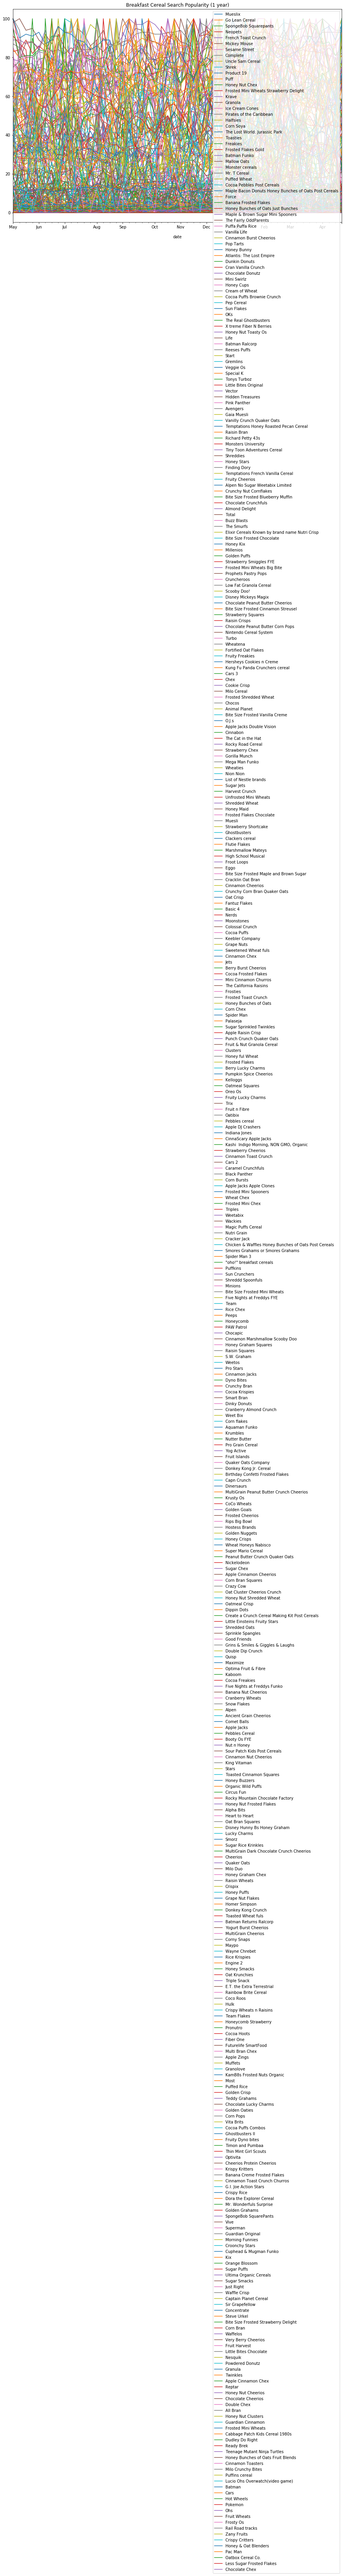

In [26]:
df_over_time.plot(figsize=(15,10), title="Breakfast Cereal Search Popularity (1 year)")
plt.show()

This graph is pretty overwhelming and very congested with so much overlapping data to look at. It does not make sense to look at every single cereal being searched over the past year since we cannot really make sense of it. Instead, I am going to look at the top 20 cereal being searched.

In [27]:
df_over_time = df_over_time.append(df_over_time.sum().rename('Total'))

In [28]:
df_over_time = df_over_time.sort_values(by='Total', axis=1, ascending=False)
df_over_time

Life  Complete    Eggo  Concentrate  Just Right  \
date                                                                     
2018-05-06 00:00:00    98.0      87.0    95.0        100.0        95.0   
2018-05-13 00:00:00   100.0      85.0    78.0         90.0        89.0   
2018-05-20 00:00:00    94.0      80.0    88.0         92.0        73.0   
2018-05-27 00:00:00    95.0      80.0    88.0         91.0        71.0   
2018-06-03 00:00:00    89.0      83.0    84.0         93.0        72.0   
2018-06-10 00:00:00    86.0      82.0    92.0         87.0        84.0   
2018-06-17 00:00:00    83.0      79.0    87.0         89.0        83.0   
2018-06-24 00:00:00    84.0      78.0    96.0         96.0        72.0   
2018-07-01 00:00:00    82.0      75.0    72.0         93.0        78.0   
2018-07-08 00:00:00    85.0      78.0    80.0         92.0        83.0   
2018-07-15 00:00:00    82.0      79.0    95.0         89.0        87.0   
2018-07-22 00:00:00    84.0      77.0    92.0         88.0        80.0   
2018-07-29 00:00:00    84.0      79.0    86.0         84.0        78.0   
2018-08-05 00:00:00    86.0      79.0    89.0         86.0        79.0   
2018-08-12 00:00:00    83.0      90.0    94.0         89.0        76.0   
2018-08-19 00:00:00    87.0      85.0    82.0         89.0        76.0   
2018-08-26 00:00:00    86.0      88.0    84.0         79.0        85.0   
2018-09-02 00:00:00    88.0      86.0   100.0         83.0        78.0   
2018-09-09 00:00:00    89.0      88.0    93.0         77.0        91.0   
2018-09-16 00:00:00    95.0      92.0    84.0         81.0        91.0   
2018-09-23 00:00:00    94.0      93.0    82.0         85.0        81.0   
2018-09-30 00:00:00    89.0      93.0    92.0         78.0        89.0   
2018-10-07 00:00:00    88.0      92.0    76.0         74.0        85.0   
2018-10-14 00:00:00    86.0      92.0    79.0         74.0        82.0   
2018-10-21 00:00:00    90.0      93.0    87.0         78.0       100.0   
2018-10-28 00:00:00    92.0      93.0    94.0         77.0        86.0   
2018-11-04 00:00:00    88.0      94.0    79.0         82.0        85.0   
2018-11-11 00:00:00    87.0      90.0    76.0         76.0        86.0   
2018-11-18 00:00:00    80.0      80.0    69.0         68.0        72.0   
2018-11-25 00:00:00    92.0      98.0    78.0         77.0        81.0   
2018-12-02 00:00:00    94.0      96.0    88.0         80.0        78.0   
2018-12-09 00:00:00    91.0      93.0    84.0         78.0        80.0   
2018-12-16 00:00:00    90.0      83.0    81.0         74.0        66.0   
2018-12-23 00:00:00    85.0      69.0    72.0         73.0        69.0   
2018-12-30 00:00:00    87.0      80.0    87.0         82.0        65.0   
2019-01-06 00:00:00    91.0      89.0    91.0         82.0        77.0   
2019-01-13 00:00:00    92.0      91.0    90.0         83.0        87.0   
2019-01-20 00:00:00    95.0      91.0   100.0         85.0        77.0   
2019-01-27 00:00:00    93.0      95.0    86.0         77.0        75.0   
2019-02-03 00:00:00    93.0      96.0    94.0         79.0        82.0   
2019-02-10 00:00:00    92.0      96.0    89.0         84.0        92.0   
2019-02-17 00:00:00    91.0      94.0    85.0         80.0        89.0   
2019-02-24 00:00:00    90.0      98.0    91.0         81.0        84.0   
2019-03-03 00:00:00    89.0      97.0    96.0         80.0        84.0   
2019-03-10 00:00:00    89.0      94.0    86.0         83.0        78.0   
2019-03-17 00:00:00    91.0      95.0    76.0         86.0        99.0   
2019-03-24 00:00:00    91.0      98.0    97.0         91.0        83.0   
2019-03-31 00:00:00    90.0      97.0    94.0         87.0        94.0   
2019-04-07 00:00:00    93.0     100.0    88.0         94.0        81.0   
2019-04-14 00:00:00    93.0      97.0    76.0         96.0        87.0   
2019-04-21 00:00:00    93.0      94.0    68.0         89.0        85.0   
2019-04-28 00:00:00    93.0      94.0    86.0         97.0        93.0   
Total                4652.0

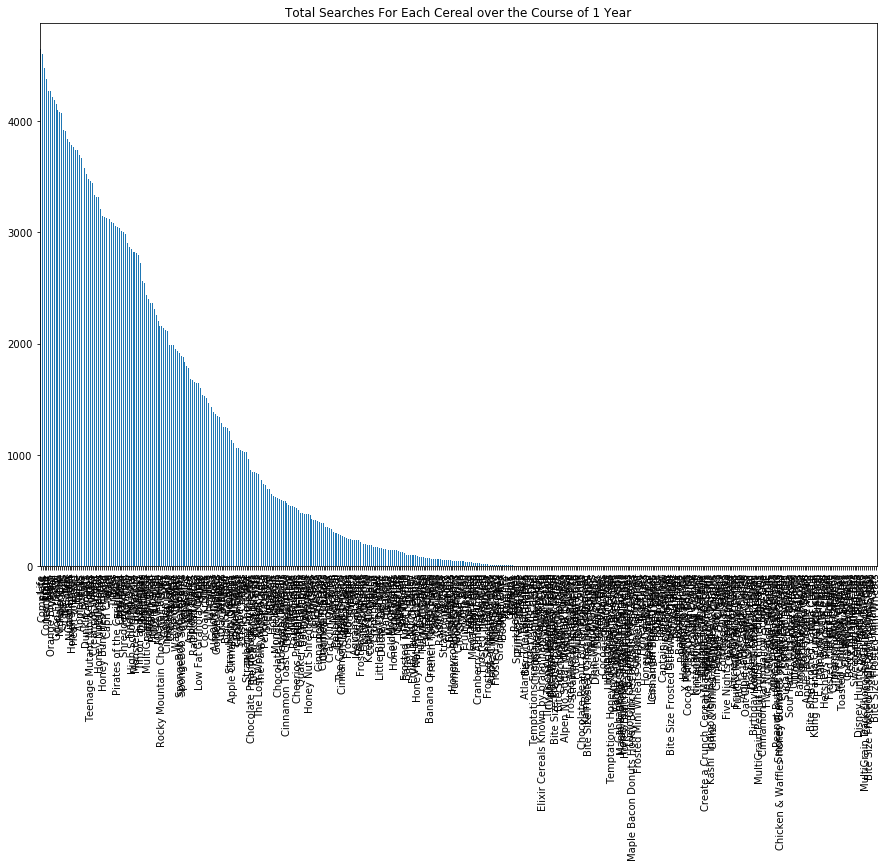

In [29]:
df_over_time.loc['Total'].plot.bar(figsize=(15,10), title="Total Searches For Each Cereal over the Course of 1 Year")
plt.show()

By looking at the 'Total' row that sums up the values in each column, we can see that some terms in our list of cereals never actually are searched. We will remove the insignificant ones from our dataset. Insignificant can be defined here as having been searched less than a total of 500 times in the entire year.

In [30]:
df_over_time_shortened = df_over_time[df_over_time.columns[(df_over_time.loc['Total']>500).values]]
df_over_time_shortened

Life  Complete    Eggo  Concentrate  Just Right  \
date                                                                     
2018-05-06 00:00:00    98.0      87.0    95.0        100.0        95.0   
2018-05-13 00:00:00   100.0      85.0    78.0         90.0        89.0   
2018-05-20 00:00:00    94.0      80.0    88.0         92.0        73.0   
2018-05-27 00:00:00    95.0      80.0    88.0         91.0        71.0   
2018-06-03 00:00:00    89.0      83.0    84.0         93.0        72.0   
2018-06-10 00:00:00    86.0      82.0    92.0         87.0        84.0   
2018-06-17 00:00:00    83.0      79.0    87.0         89.0        83.0   
2018-06-24 00:00:00    84.0      78.0    96.0         96.0        72.0   
2018-07-01 00:00:00    82.0      75.0    72.0         93.0        78.0   
2018-07-08 00:00:00    85.0      78.0    80.0         92.0        83.0   
2018-07-15 00:00:00    82.0      79.0    95.0         89.0        87.0   
2018-07-22 00:00:00    84.0      77.0    92.0         88.0        80.0   
2018-07-29 00:00:00    84.0      79.0    86.0         84.0        78.0   
2018-08-05 00:00:00    86.0      79.0    89.0         86.0        79.0   
2018-08-12 00:00:00    83.0      90.0    94.0         89.0        76.0   
2018-08-19 00:00:00    87.0      85.0    82.0         89.0        76.0   
2018-08-26 00:00:00    86.0      88.0    84.0         79.0        85.0   
2018-09-02 00:00:00    88.0      86.0   100.0         83.0        78.0   
2018-09-09 00:00:00    89.0      88.0    93.0         77.0        91.0   
2018-09-16 00:00:00    95.0      92.0    84.0         81.0        91.0   
2018-09-23 00:00:00    94.0      93.0    82.0         85.0        81.0   
2018-09-30 00:00:00    89.0      93.0    92.0         78.0        89.0   
2018-10-07 00:00:00    88.0      92.0    76.0         74.0        85.0   
2018-10-14 00:00:00    86.0      92.0    79.0         74.0        82.0   
2018-10-21 00:00:00    90.0      93.0    87.0         78.0       100.0   
2018-10-28 00:00:00    92.0      93.0    94.0         77.0        86.0   
2018-11-04 00:00:00    88.0      94.0    79.0         82.0        85.0   
2018-11-11 00:00:00    87.0      90.0    76.0         76.0        86.0   
2018-11-18 00:00:00    80.0      80.0    69.0         68.0        72.0   
2018-11-25 00:00:00    92.0      98.0    78.0         77.0        81.0   
2018-12-02 00:00:00    94.0      96.0    88.0         80.0        78.0   
2018-12-09 00:00:00    91.0      93.0    84.0         78.0        80.0   
2018-12-16 00:00:00    90.0      83.0    81.0         74.0        66.0   
2018-12-23 00:00:00    85.0      69.0    72.0         73.0        69.0   
2018-12-30 00:00:00    87.0      80.0    87.0         82.0        65.0   
2019-01-06 00:00:00    91.0      89.0    91.0         82.0        77.0   
2019-01-13 00:00:00    92.0      91.0    90.0         83.0        87.0   
2019-01-20 00:00:00    95.0      91.0   100.0         85.0        77.0   
2019-01-27 00:00:00    93.0      95.0    86.0         77.0        75.0   
2019-02-03 00:00:00    93.0      96.0    94.0         79.0        82.0   
2019-02-10 00:00:00    92.0      96.0    89.0         84.0        92.0   
2019-02-17 00:00:00    91.0      94.0    85.0         80.0        89.0   
2019-02-24 00:00:00    90.0      98.0    91.0         81.0        84.0   
2019-03-03 00:00:00    89.0      97.0    96.0         80.0        84.0   
2019-03-10 00:00:00    89.0      94.0    86.0         83.0        78.0   
2019-03-17 00:00:00    91.0      95.0    76.0         86.0        99.0   
2019-03-24 00:00:00    91.0      98.0    97.0         91.0        83.0   
2019-03-31 00:00:00    90.0      97.0    94.0         87.0        94.0   
2019-04-07 00:00:00    93.0     100.0    88.0         94.0        81.0   
2019-04-14 00:00:00    93.0      97.0    76.0         96.0        87.0   
2019-04-21 00:00:00    93.0      94.0    68.0         89.0        85.0   
2019-04-28 00:00:00    93.0      94.0    86.0         97.0        93.0   
Total                4652.0

In [31]:
from pandas import ExcelWriter

writer = ExcelWriter('20trendingterms.xlsx')
df_over_time_shortened.iloc[:, :20].to_excel(writer,'Sheet1')
writer.save()

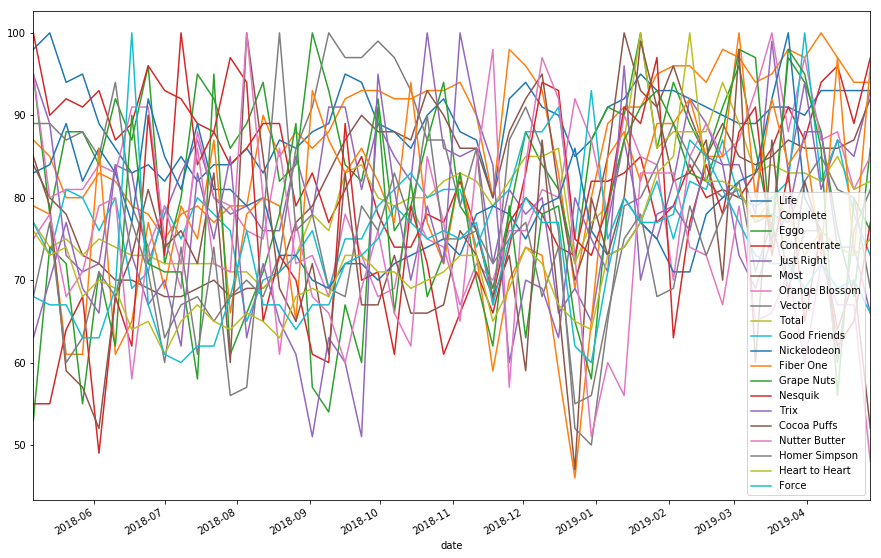

In [32]:
df_over_time_shortened = df_over_time_shortened.drop("Total", axis=0)
df_over_time_shortened.iloc[:, :20].plot(figsize=(15, 10))
plt.show()

So, this data is clearly off because it is showing us Google searches of terms that are not only cereal names but also common vocabulary words, character names, or pop culture references. We can adjust our data to add the word "cereal" to the end of each term to give a more accurate representation of the most searched for cereal within the past year.

In [33]:
new_clean_list = []
for item in clean_list:
    if "cereal" not in item:
        item = item+" cereal"
        new_clean_list.append(item)

In [34]:
df2 = pd.DataFrame(new_clean_list, columns=["Cereal"])
df2.to_csv('new_cereal_list.csv', index=False)

In [35]:
pytrends = TrendReq(hl='en-US', tz=360)
kwds2 = []
for row in csv.reader(open('new_cereal_list.csv')):
         kwds2.append(row[0])

In [36]:
chunks_list2 = [kwds2[i:i + 5] for i in range(0, len(kwds2), 5)]

In [37]:
# generate dataframe for interest over the last year (US Region) of all cereal types
df_over_time2 = pd.DataFrame()
i=0
while i<len(chunks_list2):
    pytrends.build_payload(chunks_list2[i], cat=0, timeframe='today 12-m', geo='US', gprop='')
    time_data = pytrends.interest_over_time()
    df_over_time2 = df_over_time2.append(time_data, ignore_index=False, sort=False)
    i=i+1

In [38]:
df_over_time2 = df_over_time2.fillna(0.0)
df_over_time2 = df_over_time2.drop('isPartial', axis=1)
df_over_time2 = df_over_time2.groupby(df_over_time2.index).sum()
df_over_time2 = df_over_time2.append(df_over_time2.sum().rename('Total'))

In [39]:
df_over_time2 = df_over_time2.sort_values(by='Total', axis=1, ascending=False)
df_over_time_shortened2 = df_over_time2[df_over_time2.columns[(df_over_time2.loc['Total']>500).values]]
df_over_time_shortened2

Start cereal  Granola cereal  Most cereal  \
date                                                             
2018-05-06 00:00:00          68.0            78.0         68.0   
2018-05-13 00:00:00          70.0            78.0         60.0   
2018-05-20 00:00:00          58.0            70.0         39.0   
2018-05-27 00:00:00          95.0            64.0         52.0   
2018-06-03 00:00:00          72.0            72.0         48.0   
2018-06-10 00:00:00          61.0            52.0         52.0   
2018-06-17 00:00:00          92.0            76.0         54.0   
2018-06-24 00:00:00          80.0            67.0         55.0   
2018-07-01 00:00:00          72.0            45.0         46.0   
2018-07-08 00:00:00          67.0            63.0         58.0   
2018-07-15 00:00:00          80.0            76.0         64.0   
2018-07-22 00:00:00          69.0            55.0         59.0   
2018-07-29 00:00:00          70.0           100.0         47.0   
2018-08-05 00:00:00          73.0            99.0         61.0   
2018-08-12 00:00:00          79.0            70.0         49.0   
2018-08-19 00:00:00          68.0            90.0         59.0   
2018-08-26 00:00:00          63.0            45.0         66.0   
2018-09-02 00:00:00          79.0            52.0         48.0   
2018-09-09 00:00:00          62.0            59.0         95.0   
2018-09-16 00:00:00          82.0            87.0         63.0   
2018-09-23 00:00:00          82.0            71.0         73.0   
2018-09-30 00:00:00          80.0            55.0         57.0   
2018-10-07 00:00:00         100.0            65.0         51.0   
2018-10-14 00:00:00          71.0            52.0         60.0   
2018-10-21 00:00:00          74.0            51.0         78.0   
2018-10-28 00:00:00          73.0            50.0         67.0   
2018-11-04 00:00:00          61.0            59.0         86.0   
2018-11-11 00:00:00          82.0            58.0         54.0   
2018-11-18 00:00:00          73.0            42.0         55.0   
2018-11-25 00:00:00          67.0            54.0         36.0   
2018-12-02 00:00:00          65.0            37.0         62.0   
2018-12-09 00:00:00          69.0            52.0         80.0   
2018-12-16 00:00:00          61.0            45.0         89.0   
2018-12-23 00:00:00          67.0            38.0         57.0   
2018-12-30 00:00:00          69.0            70.0         62.0   
2019-01-06 00:00:00          81.0            84.0         91.0   
2019-01-13 00:00:00          80.0            96.0         71.0   
2019-01-20 00:00:00          72.0            81.0         69.0   
2019-01-27 00:00:00          74.0            83.0        100.0   
2019-02-03 00:00:00          68.0            62.0         80.0   
2019-02-10 00:00:00          84.0            71.0         74.0   
2019-02-17 00:00:00          80.0            84.0         63.0   
2019-02-24 00:00:00          77.0            82.0         80.0   
2019-03-03 00:00:00          68.0            69.0         96.0   
2019-03-10 00:00:00          72.0            52.0         92.0   
2019-03-17 00:00:00          74.0            69.0         88.0   
2019-03-24 00:00:00          62.0            81.0         74.0   
2019-03-31 00:00:00          65.0            76.0         95.0   
2019-04-07 00:00:00          73.0            69.0         61.0   
2019-04-14 00:00:00          69.0            72.0         62.0   
2019-04-21 00:00:00          79.0            65.0         74.0   
2019-04-28 00:00:00          83.0            85.0         97.0   
Total                      3815.0          3478.0       3477.0   

                     Shredded Wheat cereal  Raisin Bran cereal  Life cereal  \
date                                                                          
2018-05-06 00:00:00                   73.0                36.0         47.0   
2018-05-13 00:00:00                   53.0                67.0         67.0   
2018-05-20 00:00:00                   44.0                44.0         51.

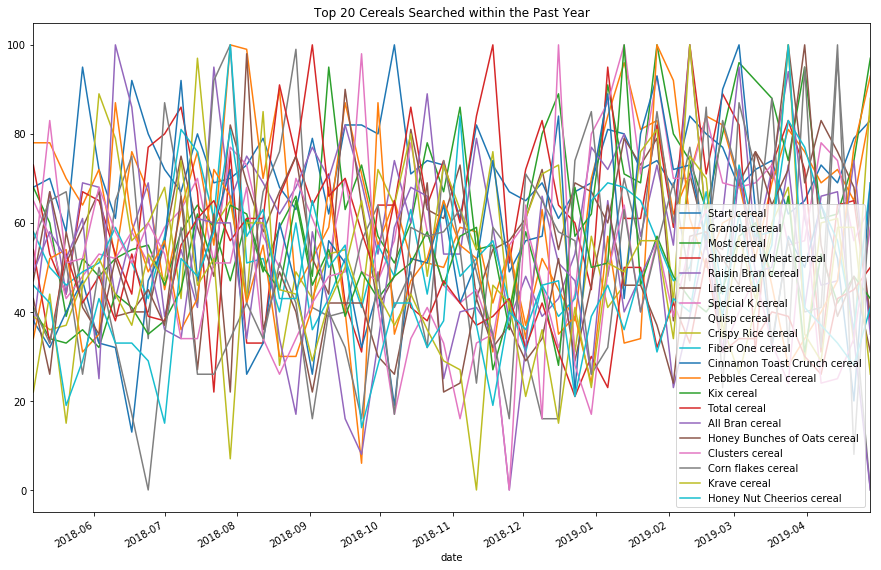

In [40]:
df_over_time_shortened2 = df_over_time_shortened2.drop("Total", axis=0)

writer = ExcelWriter('20trendingcereals.xlsx')
df_over_time_shortened2.iloc[:, :20].to_excel(writer,'Sheet1')
writer.save()

df_over_time_shortened2.iloc[:, :20].plot(figsize=(15, 10), title="Top 20 Cereals Searched within the Past Year")
plt.show()

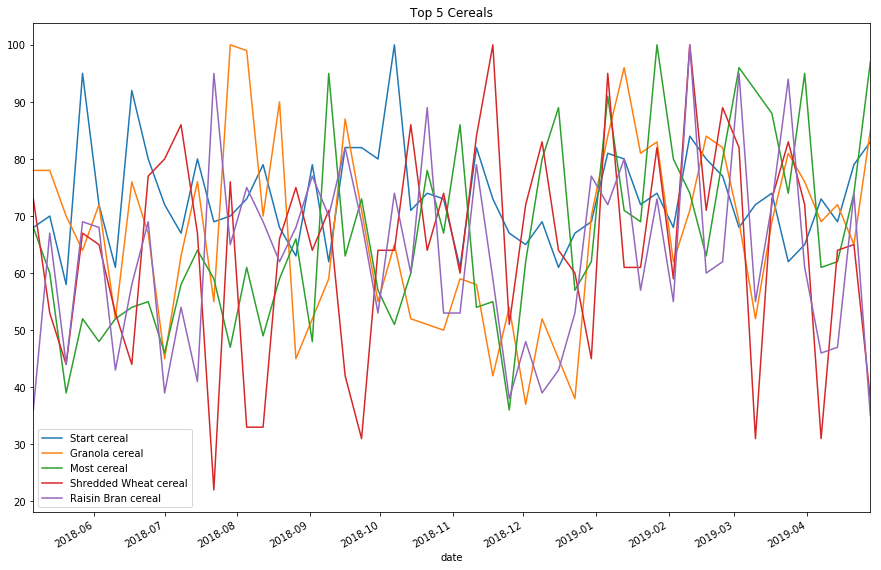

In [41]:
df_over_time_shortened2.iloc[:, :5].plot(figsize=(15,10), title="Top 5 Cereals")
plt.show()

This data already seems much more accurate than our previous graph of the top 20 cereals search on Google within the past year.<br>
Our new and improved data set of the top 500 cereals trending on Google within the past year will be what we will work with to build our neural network to further explore this data.

In [42]:
cereal_trending_list = list(df_over_time_shortened2.columns.values)
cereal_trending_list[:30]

['Start cereal',
 'Granola cereal',
 'Most cereal',
 'Shredded Wheat cereal',
 'Raisin Bran cereal',
 'Life cereal',
 'Special K cereal',
 'Quisp cereal',
 'Crispy Rice cereal',
 'Fiber One cereal',
 'Cinnamon Toast Crunch cereal',
 'Pebbles Cereal cereal',
 'Kix cereal',
 'Total cereal',
 'All Bran cereal',
 'Honey Bunches of Oats cereal',
 'Clusters cereal',
 'Corn flakes cereal',
 'Krave cereal',
 'Honey Nut Cheerios cereal',
 'Kelloggs cereal',
 'Team cereal',
 'Kaboom cereal',
 'Lucky Charms cereal',
 'Frosted Flakes cereal',
 'Grape Nuts cereal',
 'Basic 4 cereal',
 'Dunkin Donuts cereal',
 'Stars cereal',
 'Corn Bran cereal']

In [131]:
# manually had to create a list from the existing above list based on which wikipedia pages actually existed for the top cereals
cereal_list_links = ["Life (cereal)", "Kix (cereal)", "Start (cereal)",
                     "Honeycomb (cereal)", "Raisin Bran", "Rice Krispies",
                     "Cinnamon Toast Crunch", "Corn flakes", "Honey Nut Cheerios",
                     "Special K", "All-Bran", "Krave (cereal)", "Cocoa Puffs",
                     "Total (cereal)", "Corn Pops", "Pebbles cereal", "Force (cereal)",
                     "Honey Bunches of Oats", "Frosted Flakes", "Lucky Charms"]

In [104]:
import os.path
import requests

path = "./cereals2"
S = requests.Session()
URL = "https://en.wikipedia.org/w/api.php"

PARAMS = {
    'action': "query",
    'titles': "",
    'format': "json",
    'prop' : 'revisions',
    'rvprop': 'content'
}

for x in cereal_list_links:
    PARAMS['titles'] = x
    R = S.get(url=URL, params=PARAMS)
    cereal = R.json()
    json_size = len(cereal)
    
    x = x.replace(" ", "_")
    x = x.replace("/","")
    x= x.replace("(", "_")
    x = x.replace(")", "_")            
                 
    f_name = x + ".txt"
    completePath = os.path.join(path, f_name) 
    
    try:
        with open(completePath, 'w+') as file:
            json.dump(cereal, file)
    except FileNotFoundError:
        print("Nope")

In [105]:
#Find page lengths of each cereal
%matplotlib inline
from matplotlib import pyplot as plt
from collections import Counter

def extract_lengths():
    cereal_wikipage_lengths={}
    for c in os.listdir("cereals2/"):
        with open("cereals2/%s" % c) as fp:
            cereal_wikipage_lengths.update( {c : len(fp.read())} )
    return cereal_wikipage_lengths
    
len_cereal = extract_lengths()

top20_trending_cereal = Counter(len_cereal).most_common(20)

print("Top 20 Trending breakfast cereals with longest Wiki pages:")
for k, v in top20_trending_cereal:
    print(v, "\t\t", k[:-4])

Top 20 Trending breakfast cereals with longest Wiki pages:
21761 		 Special_K
19692 		 Lucky_Charms
18619 		 Pebbles_cereal
16229 		 Rice_Krispies
13765 		 Corn_flakes
9535 		 Cinnamon_Toast_Crunch
8634 		 Frosted_Flakes
8555 		 Corn_Pops
8079 		 Honeycomb__cereal_
6441 		 Cocoa_Puffs
6234 		 Life__cereal_
6011 		 Force__cereal_
5890 		 Honey_Nut_Cheerios
5876 		 All-Bran
4917 		 Kix__cereal_
4485 		 Raisin_Bran
4252 		 Honey_Bunches_of_Oats
3618 		 Krave__cereal_
2420 		 Total__cereal_
2385 		 Start__cereal_


C:\Users\Lisa\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


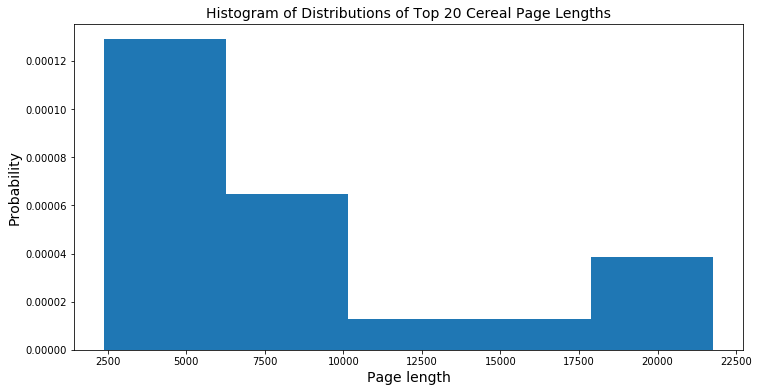

In [106]:
#Find page lengths of each cereal
%matplotlib inline
from matplotlib import pyplot as plt

def extract_lengths():
    lengths = []
    for c in os.listdir("cereals2/"):
        with open("cereals2/%s" % c) as fp:
            lengths.append(len(fp.read()))
    return lengths
    
len_cereal = extract_lengths()

plt.figure(figsize=(12,6))
plt.title("Histogram of Distributions of Top 20 Cereal Page Lengths", fontsize=14)
plt.hist(len_cereal, bins=5, normed=True)
#plt.xticks([x*10000 for x in range(0, 11)], rotation='vertical')

plt.xlabel("Page length", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend()
plt.show()

Extracting the page lengths of the top 20 trending cereals can tell me a lot about the popularity of each cereal. Plotting the distribution allows me to compare pagelengths and see which of the cereals have the most content written on Wikipedia.

# What connects the top 20 trending cereals?<br>
Is there any common pattern between the language used in the cereals' Wikipedia pages? 
To investigate any relationships between the top 20 trendng cereals, I am generating a networkx.Graph that represents each partnership between cereals, as an edge.

**Get Pagelengths of each cereal**

In [116]:
import re, os

links = cereal_list_links
links = [re.sub(r'(\s)|(\()|(\))', '_', item) for item in links]
links = [re.sub(r'\/', '', item) for item in links]

def get_owner(char):
    """Return list of alliances for cereal."""
    
    # Load character markup
    with open("../Final Project/cereals2/%s.txt" % (char), encoding='latin1') as fp:
        markup = fp.read()
        
    # Get owner field
    owner_field = re.findall(r"(\| *currentowner[\w\W]+?\|.+=)", markup)
    if owner_field == []:
        owner_field = re.findall(r"(\| *creator[\w\W]+?\|.+=)", markup)
        if owner_field == []:
            return []
    
    return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", owner_field[0])][0]
 
    # Extract links from owner field
    #return [t[2:-1] for t in re.findall(r"\[\[.+?[\]\|]", owner_field[0])]

get_owner("Lucky_Charms")

# Owner
# mention of logo/mascot
# Tagline (exists?)
# mention of sugar
# mention of negative sentiments, adjectives?

'General Mills'

In [121]:
for cereal in links:
    print(cereal,"\t\t\t is owned by: ",get_owner(cereal))

Life__cereal_ 			 is owned by:  []
Kix__cereal_ 			 is owned by:  General Mills
Start__cereal_ 			 is owned by:  []
Honeycomb__cereal_ 			 is owned by:  []
Raisin_Bran 			 is owned by:  []
Rice_Krispies 			 is owned by:  Kellogg Company
Cinnamon_Toast_Crunch 			 is owned by:  General Mills
Corn_flakes 			 is owned by:  John Harvey Kellogg
Honey_Nut_Cheerios 			 is owned by:  []
Special_K 			 is owned by:  []
All-Bran 			 is owned by:  Kellogg Company
Krave__cereal_ 			 is owned by:  []
Cocoa_Puffs 			 is owned by:  []
Total__cereal_ 			 is owned by:  []
Corn_Pops 			 is owned by:  []
Pebbles_cereal 			 is owned by:  []
Force__cereal_ 			 is owned by:  Sunny Jim
Honey_Bunches_of_Oats 			 is owned by:  []
Frosted_Flakes 			 is owned by:  []
Lucky_Charms 			 is owned by:  General Mills


# Wikipedia's Lamest Edit Wars
Which trending cereal is the most controversial? (the most edits)<br>
To start, fetched the list of the top 20 trending cereal Wiki articles and counted the number of times each of them was revised.

In [132]:
def get_revision_counts(title):
    """Returns list of revision counts."""
    URL = "http://en.wikipedia.org/w/api.php"
    TITLE = title
    
    PARAMS = { 
        'action': 'query',
        'format': 'json',
        'continue': '',
        'titles': TITLE,
        'prop': 'revisions',
        'rvprop': 'ids|userid',
        'rvlimit': 'max'
    }

    total_revisions = 0

    while True:
      wp_call = requests.get(URL, params=PARAMS)
      response = wp_call.json()

      for page_id in response['query']['pages']:
        total_revisions += len(response['query']['pages'][page_id]['revisions'])

      if 'continue' in response:
        PARAMS['continue'] = response['continue']['continue']
        PARAMS['rvcontinue'] = response['continue']['rvcontinue']

      else:
        break

    return total_revisions

# Extract lists of cereal
revision_count_dict = {}
for title in cereal_list_links:
    revision_count_dict.update({title : get_revision_counts(title)})
    #print(title,": ", get_revision_counts(title))
    #revision_count_dict.append(get_revision_counts(title))

In [145]:
revision_count_dict

{'All-Bran': 178,
 'Cinnamon Toast Crunch': 600,
 'Cocoa Puffs': 918,
 'Corn Pops': 456,
 'Corn flakes': 1675,
 'Force (cereal)': 49,
 'Frosted Flakes': 1582,
 'Honey Bunches of Oats': 281,
 'Honey Nut Cheerios': 503,
 'Honeycomb (cereal)': 400,
 'Kix (cereal)': 269,
 'Krave (cereal)': 134,
 'Life (cereal)': 261,
 'Lucky Charms': 2300,
 'Pebbles cereal': 894,
 'Raisin Bran': 429,
 'Rice Krispies': 1162,
 'Special K': 733,
 'Start (cereal)': 56,
 'Total (cereal)': 250}

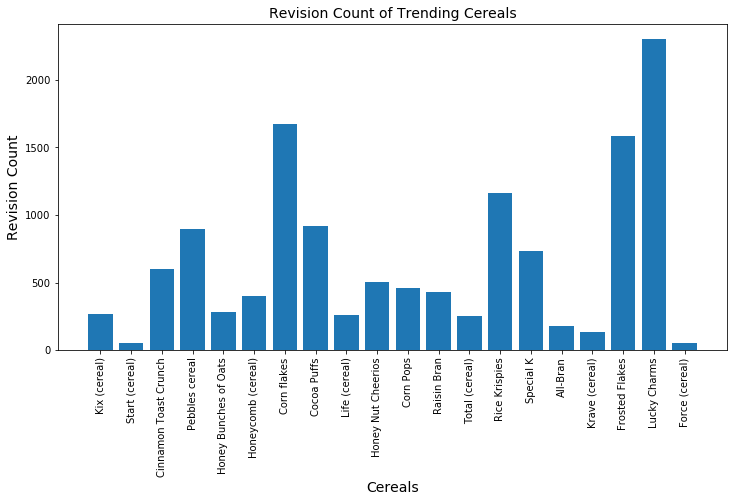

In [134]:
plt.figure(figsize=(12,6))
plt.title("Revision Count of Trending Cereals", fontsize=14)
plt.bar(range(len(revision_count_dict)), list(revision_count_dict.values()), align='center')
plt.xticks(range(len(revision_count_dict)), list(revision_count_dict.keys()))

plt.xlabel("Cereals", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Revision Count", fontsize=14)
plt.show()



In [135]:
sorted_revision_count_dict = sorted(revision_count_dict.items(), key=lambda kv: kv[1])
sorted_revision_count_dict

[('Force (cereal)', 49),
 ('Start (cereal)', 56),
 ('Krave (cereal)', 134),
 ('All-Bran', 178),
 ('Total (cereal)', 250),
 ('Life (cereal)', 261),
 ('Kix (cereal)', 269),
 ('Honey Bunches of Oats', 281),
 ('Honeycomb (cereal)', 400),
 ('Raisin Bran', 429),
 ('Corn Pops', 456),
 ('Honey Nut Cheerios', 503),
 ('Cinnamon Toast Crunch', 600),
 ('Special K', 733),
 ('Pebbles cereal', 894),
 ('Cocoa Puffs', 918),
 ('Rice Krispies', 1162),
 ('Frosted Flakes', 1582),
 ('Corn flakes', 1675),
 ('Lucky Charms', 2300)]

# Ending Notes:

I was hoping to have gone further with this data exploration project. My hopes to investigate overlapping patterns and relationships between Breakfast Cereal were quickly diminished when I realized how inconsistent each cereal's wikipedia data was. Not every Wiki page contained an "Owner" or "Creator" header. Do to the limited time I had to work, and working alone, I took on a bit more than I could handle and definitely know I could have done a whole lot more with the data since I scraped and cleaned it. My hopes are to continue to work with this dataset and build a network of cereals to investigate relationships between their Wiki content vocabulary. Maybe there are common adjectives or ingredients mentioned between the most trending cereals.